In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('zomato_outlet_final.csv')

In [6]:
df['liked'].fillna('')

0                                   Coctails, Chaat, Beer
1       Biryani, Veg Platter, Dal Mahani, Butter Chice...
2       Pasta, Panipuri, Waffles, Pizza, Salad, Chaat,...
3                         Vanilla Ice Cream, Chaat, Sushi
4       Coctails, Beer, Peri Peri Chicen, Fish, Veg Pl...
                              ...                        
5428                                                     
5429    Naan, Mutton eema, Dum Biryani, Irani Chai, Bu...
5430                            Mutton Thali, Chicen Suha
5431                                                     
5432                                               Noodle
Name: liked, Length: 5433, dtype: object

In [8]:
df['dine_rating'] = df['dine_rating'].fillna(df['dine_rating'].mean())

In [10]:
df['delivery_rating'] = df['delivery_rating'].fillna(df['delivery_rating'].mean())

In [11]:
df['rest_type'] = df['rest_type'].str.split(',')

In [13]:
df.cuisine = df.cuisine.str.split(',')

In [14]:
df['cuisine'][0].pop()

''

In [15]:
df['cuisine'][0].append('')

In [16]:
for i in df['cuisine']:
    i.pop()

In [17]:
df.liked.str.split(',')

0                               [Coctails,  Chaat,  Beer]
1       [Biryani,  Veg Platter,  Dal Mahani,  Butter C...
2       [Pasta,  Panipuri,  Waffles,  Pizza,  Salad,  ...
3                     [Vanilla Ice Cream,  Chaat,  Sushi]
4       [Coctails,  Beer,  Peri Peri Chicen,  Fish,  V...
                              ...                        
5428                                                  NaN
5429    [Naan,  Mutton eema,  Dum Biryani,  Irani Chai...
5430                         [Mutton Thali,  Chicen Suha]
5431                                                  NaN
5432                                             [Noodle]
Name: liked, Length: 5433, dtype: object

In [18]:
df.liked = df.liked.fillna('')

In [19]:
df.delivery_reviews = df.delivery_reviews.fillna(0)

In [21]:
df.liked = df.liked.str.split(',')

In [23]:
for i in df['delivery_rating']:
    i = round(i,1)

In [24]:
df.delivery_rating =df.delivery_rating.round(decimals = 1)

In [26]:
df.to_csv('final_cleaned.csv')

In [27]:
df1 = pd.read_csv('semi_cleaned.csv')

In [28]:
df2 = df1.cuisine.str.split(',', expand = True)

In [29]:
df2 = df2.drop(columns = 8)

In [31]:
df['cuisine 1'] = df2[0]

In [32]:
df['cuisine 2'] = df2[1]
df['cuisine 3'] = df2[2]
df['cuisine 4'] = df2[3]
df['cuisine 5'] = df2[4]
df['cuisine 6'] = df2[5]
df['cuisine 7'] = df2[6]
df['cuisine 8'] = df2[7]

In [33]:
df3 = df1.rest_type.str.split(',', expand = True)

In [35]:
df['t1'] = df3[0]

In [37]:
df['t2'] = df3[1]

In [38]:
df4 = df1.liked.str.split(',', expand = True)

In [40]:
df4 = df4.fillna('')

In [42]:
df['l1'] = df4[0]
df['l2'] = df4[1]
df['l3'] = df4[2]
df['l4'] = df4[3]
df['l5'] = df4[4]
df['l6'] = df4[5]
df['l7'] = df4[6]

In [43]:
df =df.drop(columns = ['liked', 'cuisine'])

In [44]:
df5 = df1['loc'].str.split(',')

In [46]:
df['location'] = [i[-1]  for i in df5]

In [48]:
df = df.drop(columns = 'lin')

# Deductions

C:\Users\Manas Sewatkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dine_rating', ylabel='dine_reviews'>

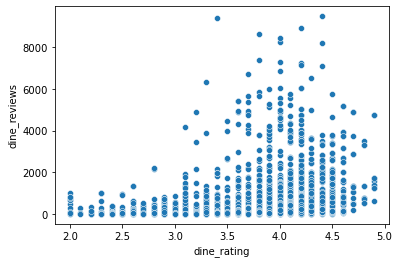

In [50]:
sns.scatterplot(df.dine_rating, df.dine_reviews)

## Number of reviews are max near the mean of rating. Implies people tend to give average or no reviews.

C:\Users\Manas Sewatkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dine_reviews', ylabel='cost'>

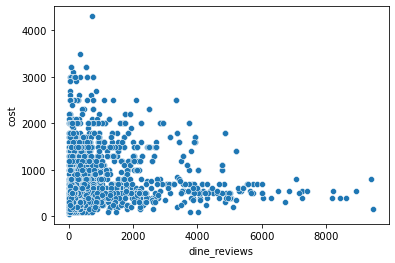

In [51]:
sns.scatterplot(df.dine_reviews, df.cost)

## Number of reviews near mean cost are highest. Implies people tend to visit and review the restaurants which have average cost.

In [97]:
ls = []
ls.append(list(df['cuisine 1']))
ls.append(list(df['cuisine 2']))
ls.append(list(df['cuisine 3']))
ls.append(list(df['cuisine 4']))
ls.append(list(df['cuisine 5']))
ls.append(list(df['cuisine 6']))
ls.append(list(df['cuisine 7']))
ls.append(list(df['cuisine 8']))
lsf = []
for i in ls:
    for j in i:
        lsf.append(j)
i = 0

Yes


In [79]:
slf = set(lsf)

In [81]:
slf.pop()

''

In [99]:
len(slf)
slf = list(slf)
for x in range(lsf.count('')):
    lsf.remove('')

In [88]:
cuisine = {slf[i]: 0 for i in range(len(slf))}

In [101]:
for i in lsf:
    cuisine[i]+=1

In [105]:
x1 = sorted(cuisine.items(), key=lambda x: x[1], reverse=True)

In [107]:
x1.pop(0)

(None, 22563)

In [111]:
x1[:5]

[('North Indian', 2130),
 ('Fast Food', 1491),
 ('Chinese', 1482),
 ('Beverages', 1123),
 ('Desserts', 1060)]

## Top 5 cuisines in Pune restaurants are: 1) North Indian, 2) Fast Food, 3) Chinese, 4) Beverages, 5) Desserts.

C:\Users\Manas Sewatkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cost', ylabel='dine_reviews'>

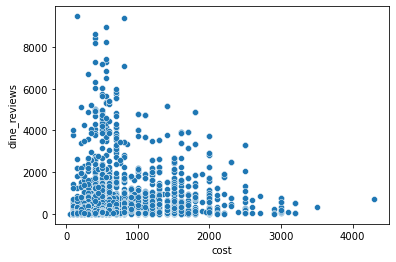

In [60]:
sns.scatterplot(df.cost, df['dine_reviews'])

In [61]:
df.to_csv('cleanest.csv')

In [63]:
def average_cost(x):
    y = df[df['location'] == x]
    s = y['cost'].sum()
    s/=len(y)
    return s
ls = list(set(df['location']))

In [167]:
acost = []
for i in ls:
    acost.append(average_cost(i))
lsacostd = {ls[i]: acost[i] for i in range(len(ls))}

C:\Users\Manas Sewatkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

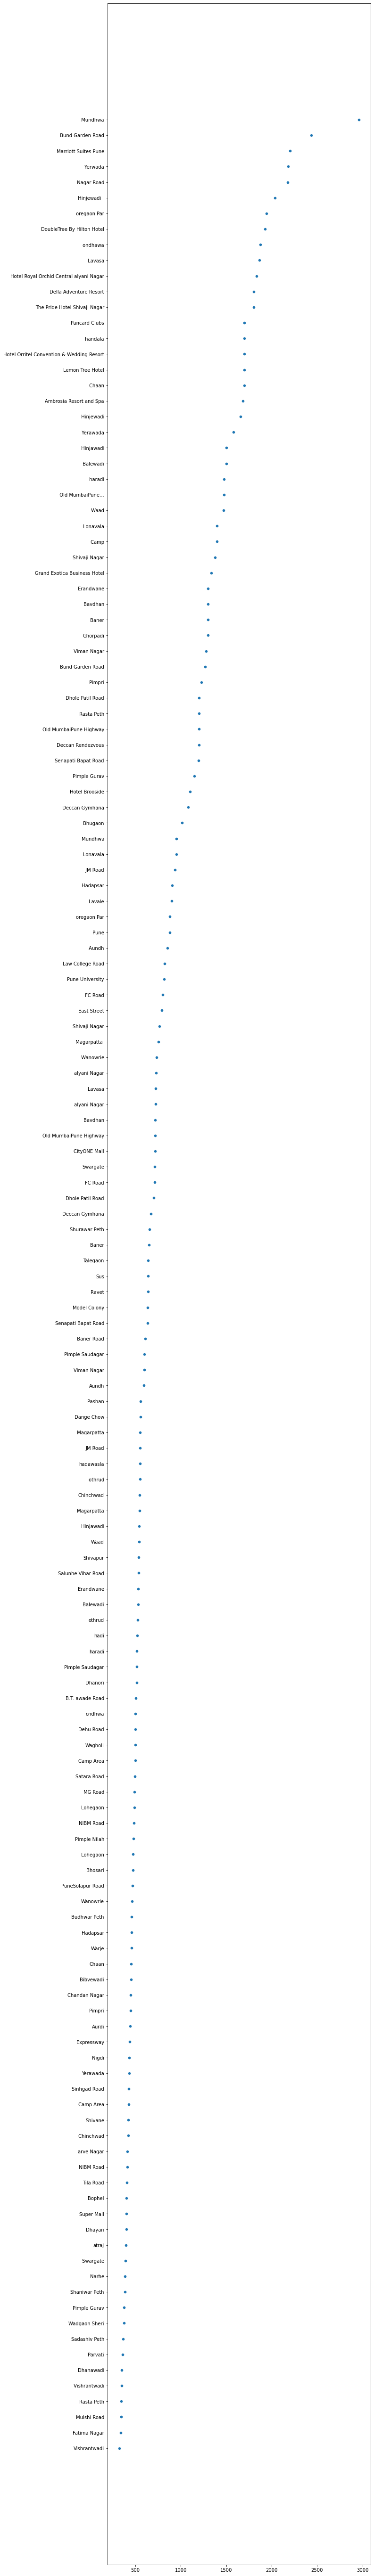

In [168]:
x,y = [], []
lsacostds = sorted(lsacostd.items(), key=lambda x: x[1], reverse=True)
for i in lsacostds:
    x.append(i[0])
    y.append(i[1])
plt.figure(figsize = (10, 100))
sns.scatterplot(y,x)

## Vishrantwadi has the least expensive places to eat wherease Mundhwa has highest prices. Mariott Suites has highest average cost amongst hotel chains

In [115]:
l = []
l.append(list(df['l1']))
l.append(list(df['l2']))
l.append(list(df['l3']))
l.append(list(df['l4']))
l.append(list(df['l5']))
l.append(list(df['l6']))
l.append(list(df['l7']))
lf = []
for i in l:
    for j in i:
        lf.append(j)
        

In [117]:
for x in range(lf.count('')):
    lf.remove('')

In [120]:
sl = set(lf)

In [123]:
sll = list(sl)

In [125]:
dl = {sll[i]: 0 for i in range(len(sll))}

In [128]:
for i in lf:
    dl[i]+=1

In [132]:
dls = sorted(dl.items(), key=lambda x: x[1], reverse=True)
dls[:5]

[(' Pasta', 522),
 (' Pizza', 390),
 (' Biryani', 390),
 (' Moctails', 386),
 (' Salad', 384)]

## Most liked foods are: Pasta, Pizza, Biriyani, Mocktails, Salad

In [135]:
locations = set(list(df['location']))

In [138]:
location1 = list(locations)

In [140]:
arl = {}
for i in location1:
    arl[i] = df[df['location'] == i]['dine_rating'].sum()/len(df[df['location'] == i]['dine_rating'])

C:\Users\Manas Sewatkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

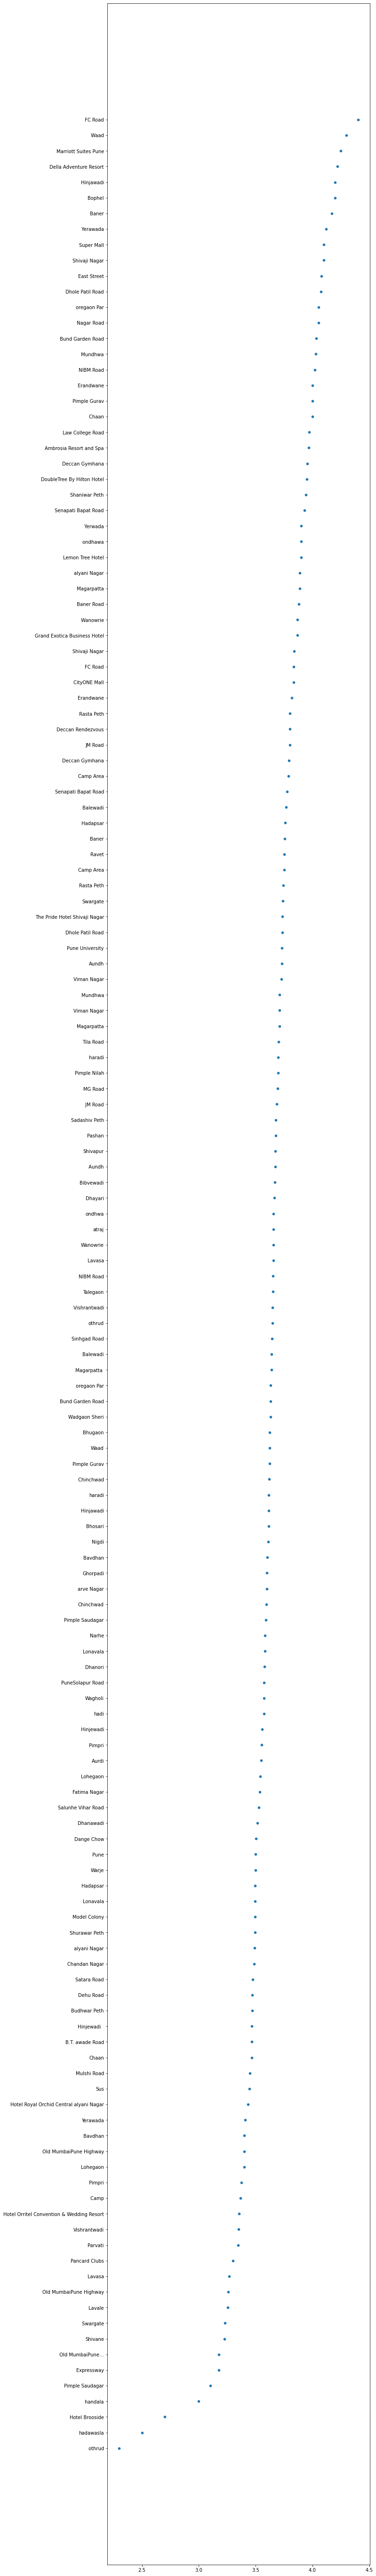

In [146]:
x = []
y = []
arls = sorted(arl.items(), key=lambda x: x[1], reverse=True)
for i in arls:
    x.append(i[0])
    y.append(i[1])
plt.figure(figsize = (10, 100))
sns.scatterplot(y,x)

## Highest rated locations: FC road, Wakad, Mariott Suites, Della Adventure Resort, Hinjewadi

In [151]:
df.t1 = df.t1.fillna('')
df.t2 = df.t2.fillna('')
types, typef = [], []
types.append(list(df['t1']))
types.append(list(df['t2']))
for i in types:
    for j in i:
        typef.append(j)

In [153]:
for x in range(typef.count('')):
    typef.remove('')

In [156]:
setf = set(typef)
listf = list(setf)
dictf = {listf[i]: 0 for i in range(len(listf))}

In [158]:
for i in typef:
    dictf[i]+=1

C:\Users\Manas Sewatkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

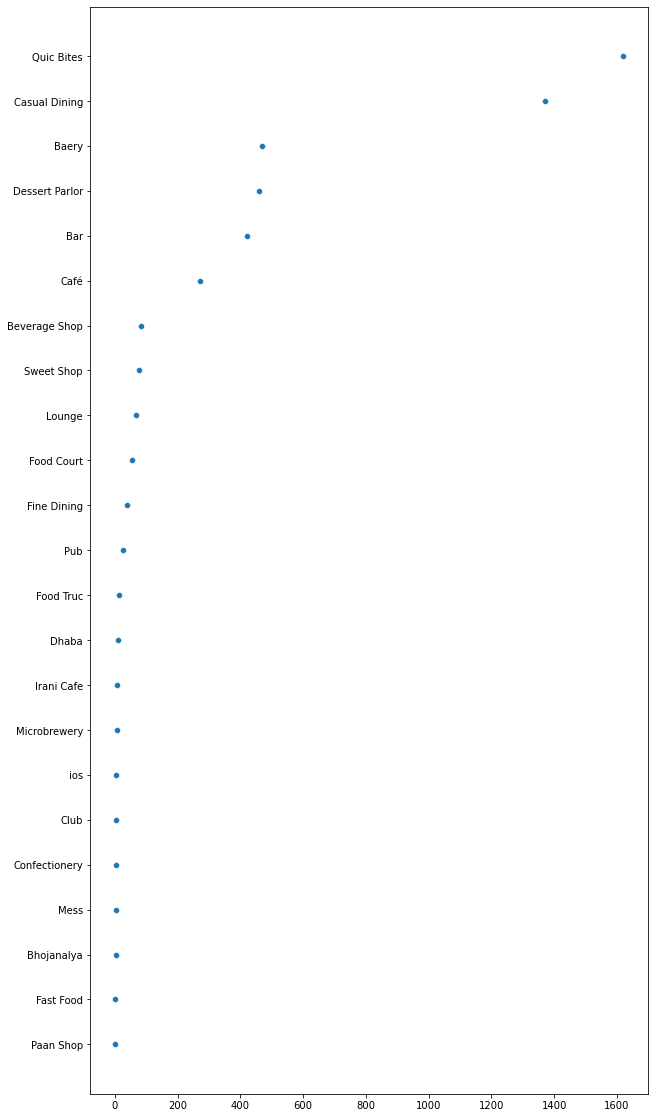

In [164]:
tuplef = sorted(dictf.items(), key=lambda x: x[1], reverse=True)
tuplef
x = []
y = []
for i in tuplef:
    x.append(i[0])
    y.append(i[1])
plt.figure(figsize = (10, 20))
sns.scatterplot(y,x)

## Most common type of restaurants: Quick Bites, Casual Dining, Bakery, Dessert Parlour and Bars

# We have cleaned and visualised the given dataset from zomato and have deduced the above conclusions.